In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [159]:
def read_and_concatenate(path, low, high):
    
    '''
    takes in csv files the range of numbers at the end of the csv files and returns
    an appended data frame
    
    input:
        path - the file path with a number for each csv
        low - lowest path number
        high - highest path number
        
    output:
        concatenated dataframe
    '''
    
    df_list = []
    for i in range(low,high+1):
        df_list.append(pd.read_csv(path.format(i)))

    concated = pd.concat(df_list)

    return concated

data = read_and_concatenate('data/book_data_{}.csv',1,6)


In [98]:
data

,Unnamed: 0,rank,title,author,format,pages,rating,score,votes,release_date,new_release_date
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"4.28 avg rating — 4,501,075 ratings","score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Hardcover,309 pages,"4.47 avg rating — 7,049,026 ratings","score: 1,776,963","18,119 people voted",(first published June 26th 1997),Published\n November 1st 2003\n ...
2,2,3,1984,George Orwell,Kindle Edition,237 pages,"4.19 avg rating — 3,140,442 ratings","score: 1,645,480","16,814 people voted",(first published June 8th 1949),Published\n September 3rd 2013\n ...
3,3,4,Pride and Prejudice,Jane Austen,Paperback,279 pages,"4.26 avg rating — 2,998,241 ratings","score: 1,417,523","14,515 people voted",(first published January 28th 1813),Published\n October 10th 2000\n ...
4,4,5,The Diary of a Young Girl,Anne Frank,Mass Market Paperback,283 pages,"4.15 avg rating — 2,741,166 ratings","score: 1,349,093","13,817 people voted",(first published June 25th 1947),Published\n July 1993\n by Bant...
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1996,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,Mass Market Paperback,307 pages,"4.04 avg rating — 79,114 ratings",score: 745,10 people voted,(first published October 10th 1988),Published\n February 15th 1991\n ...
396,396,1996,Dead Souls,Nikolai Gogol,Paperback,464 pages,"3.97 avg rating — 65,897 ratings",score: 745,9 people voted,(first published 1842),Published\n July 29th 2004\n by...
397,397,1996,The Last Valentine,Felix Alexander,Kindle Edition,241 pages,4.09 avg rating — 503 ratings,score: 745,8 people voted,NaN,Published\n February 13th 2017\n ...
398,398,1996,Twisted Love,Wally Runnels,Paperback,376 pages,4.19 avg rating — 223 ratings,score: 745,8 people voted,NaN,Published\n July 6th 2016\n by ...


In [160]:
def split_front_number(x):
    '''
    will be used with .apply to split out numbers at the front of each data column
    (could also do this with a lambda function)
    
    input:
        
        
    output:
        first value of a list which is the desired number
    '''
    
    
    return x.split(' ')[0]

data['rating'] = data.rating.apply(split_front_number)
# data['pages'] = data.pages.apply(split_number)
data['votes'] = data.votes.apply(split_front_number)

data


,Unnamed: 0,rank,title,author,format,pages,rating,score,votes,release_date,new_release_date
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,4.28,"score: 2,314,743","23,465",(first published July 11th 1960),Published\n May 23rd 2006\n by ...
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Hardcover,309 pages,4.47,"score: 1,776,963","18,119",(first published June 26th 1997),Published\n November 1st 2003\n ...
2,2,3,1984,George Orwell,Kindle Edition,237 pages,4.19,"score: 1,645,480","16,814",(first published June 8th 1949),Published\n September 3rd 2013\n ...
3,3,4,Pride and Prejudice,Jane Austen,Paperback,279 pages,4.26,"score: 1,417,523","14,515",(first published January 28th 1813),Published\n October 10th 2000\n ...
4,4,5,The Diary of a Young Girl,Anne Frank,Mass Market Paperback,283 pages,4.15,"score: 1,349,093","13,817",(first published June 25th 1947),Published\n July 1993\n by Bant...
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1996,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,Mass Market Paperback,307 pages,4.04,score: 745,10,(first published October 10th 1988),Published\n February 15th 1991\n ...
396,396,1996,Dead Souls,Nikolai Gogol,Paperback,464 pages,3.97,score: 745,9,(first published 1842),Published\n July 29th 2004\n by...
397,397,1996,The Last Valentine,Felix Alexander,Kindle Edition,241 pages,4.09,score: 745,8,NaN,Published\n February 13th 2017\n ...
398,398,1996,Twisted Love,Wally Runnels,Paperback,376 pages,4.19,score: 745,8,NaN,Published\n July 6th 2016\n by ...


,0,1
0,324,pages
1,309,pages
2,237,pages
3,279,pages
4,283,pages
...,...,...
395,307,pages
396,464,pages
397,241,pages
398,376,pages


,0,1,rating
0,4.28,"avg rating — 4,501,075 ratings",4.28
1,4.47,"avg rating — 7,049,026 ratings",4.47
2,4.19,"avg rating — 3,140,442 ratings",4.19
3,4.26,"avg rating — 2,998,241 ratings",4.26
4,4.15,"avg rating — 2,741,166 ratings",4.15
...,...,...,...
395,4.04,"avg rating — 79,114 ratings",4.04
396,3.97,"avg rating — 65,897 ratings",3.97
397,4.09,avg rating — 503 ratings,4.09
398,4.19,avg rating — 223 ratings,4.19


No handles with labels found to put in legend.


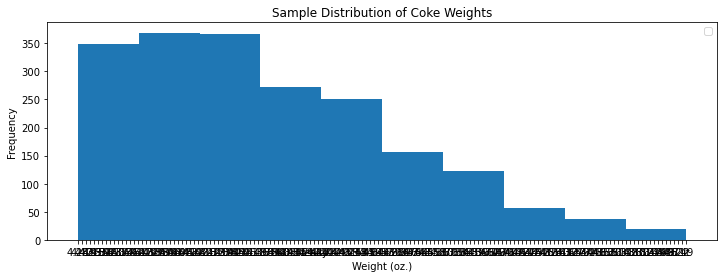

,Unnamed: 0,rank,title,author,format,pages,score,votes,release_date,new_release_date,rating
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...,4.28
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...,3.88
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...,4.33
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...,3.93
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...,4.28
...,...,...,...,...,...,...,...,...,...,...,...
399,399,1599,Eleanor Oliphant Is Completely Fine,Gail Honeyman,Hardcover,336 pages,"score: 1,089",15 people voted,NaN,Published\n May 9th 2017\n by P...,4.10
399,399,1996,Little Fires Everywhere,Celeste Ng,Hardcover,338 pages,score: 745,11 people voted,NaN,Published\n September 12th 2017\n ...,3.80
399,399,1996,Little Fires Everywhere,Celeste Ng,Hardcover,338 pages,score: 745,11 people voted,NaN,Published\n September 12th 2017\n ...,3.72
399,399,1996,Little Fires Everywhere,Celeste Ng,Hardcover,338 pages,score: 745,11 people voted,NaN,Published\n September 12th 2017\n ...,4.28


In [145]:
def split_number(x):
    '''
    will be used with .apply to split out numbers at the front of each data column
    (could also do this with a lambda function)
    
    input:
        
        
    output:
        first value of a list which is the desired number
    '''
    
    
    return x.split(' ')[0]

data['rating'] = data.rating.apply(split_number)
data

# def split_number_all_cols(df, lst):
    
#     for item in lst:
#         df[item] = df.item.apply(split_number)
    
#     return df

# changes = ['pages', 'rating']
# split_number_all_cols(data, changes)



 

,Unnamed: 0,rank,title,author,format,pages,rating,score,votes,release_date,new_release_date
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,4.28,"score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Hardcover,309 pages,4.47,"score: 1,776,963","18,119 people voted",(first published June 26th 1997),Published\n November 1st 2003\n ...
2,2,3,1984,George Orwell,Kindle Edition,237 pages,4.19,"score: 1,645,480","16,814 people voted",(first published June 8th 1949),Published\n September 3rd 2013\n ...
3,3,4,Pride and Prejudice,Jane Austen,Paperback,279 pages,4.26,"score: 1,417,523","14,515 people voted",(first published January 28th 1813),Published\n October 10th 2000\n ...
4,4,5,The Diary of a Young Girl,Anne Frank,Mass Market Paperback,283 pages,4.15,"score: 1,349,093","13,817 people voted",(first published June 25th 1947),Published\n July 1993\n by Bant...
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1996,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,Mass Market Paperback,307 pages,4.04,score: 745,10 people voted,(first published October 10th 1988),Published\n February 15th 1991\n ...
396,396,1996,Dead Souls,Nikolai Gogol,Paperback,464 pages,3.97,score: 745,9 people voted,(first published 1842),Published\n July 29th 2004\n by...
397,397,1996,The Last Valentine,Felix Alexander,Kindle Edition,241 pages,4.09,score: 745,8 people voted,NaN,Published\n February 13th 2017\n ...
398,398,1996,Twisted Love,Wally Runnels,Paperback,376 pages,4.19,score: 745,8 people voted,NaN,Published\n July 6th 2016\n by ...


In [135]:
temp = data['rating'].str.split(' ', n=1, expand=True)
temp.columns = ['rating', 'other']
temp = temp.drop('other', axis=1)
temp
# df = df.drop('rating', axis=1)
# df
# df = df.join(temp)
# df


,Unnamed: 0,rank,title,author,format,pages,rating,score,votes,release_date,new_release_date
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"4.28 avg rating — 4,501,075 ratings","score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Hardcover,309 pages,"4.47 avg rating — 7,049,026 ratings","score: 1,776,963","18,119 people voted",(first published June 26th 1997),Published\n November 1st 2003\n ...
2,2,3,1984,George Orwell,Kindle Edition,237 pages,"4.19 avg rating — 3,140,442 ratings","score: 1,645,480","16,814 people voted",(first published June 8th 1949),Published\n September 3rd 2013\n ...
3,3,4,Pride and Prejudice,Jane Austen,Paperback,279 pages,"4.26 avg rating — 2,998,241 ratings","score: 1,417,523","14,515 people voted",(first published January 28th 1813),Published\n October 10th 2000\n ...
4,4,5,The Diary of a Young Girl,Anne Frank,Mass Market Paperback,283 pages,"4.15 avg rating — 2,741,166 ratings","score: 1,349,093","13,817 people voted",(first published June 25th 1947),Published\n July 1993\n by Bant...
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1996,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,Mass Market Paperback,307 pages,"4.04 avg rating — 79,114 ratings",score: 745,10 people voted,(first published October 10th 1988),Published\n February 15th 1991\n ...
396,396,1996,Dead Souls,Nikolai Gogol,Paperback,464 pages,"3.97 avg rating — 65,897 ratings",score: 745,9 people voted,(first published 1842),Published\n July 29th 2004\n by...
397,397,1996,The Last Valentine,Felix Alexander,Kindle Edition,241 pages,4.09 avg rating — 503 ratings,score: 745,8 people voted,NaN,Published\n February 13th 2017\n ...
398,398,1996,Twisted Love,Wally Runnels,Paperback,376 pages,4.19 avg rating — 223 ratings,score: 745,8 people voted,NaN,Published\n July 6th 2016\n by ...


In [136]:
data

,Unnamed: 0,rank,title,author,format,pages,rating,score,votes,release_date,new_release_date
0,0,1,To Kill a Mockingbird,Harper Lee,Paperback,324 pages,"4.28 avg rating — 4,501,075 ratings","score: 2,314,743","23,465 people voted",(first published July 11th 1960),Published\n May 23rd 2006\n by ...
1,1,2,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling,Hardcover,309 pages,"4.47 avg rating — 7,049,026 ratings","score: 1,776,963","18,119 people voted",(first published June 26th 1997),Published\n November 1st 2003\n ...
2,2,3,1984,George Orwell,Kindle Edition,237 pages,"4.19 avg rating — 3,140,442 ratings","score: 1,645,480","16,814 people voted",(first published June 8th 1949),Published\n September 3rd 2013\n ...
3,3,4,Pride and Prejudice,Jane Austen,Paperback,279 pages,"4.26 avg rating — 2,998,241 ratings","score: 1,417,523","14,515 people voted",(first published January 28th 1813),Published\n October 10th 2000\n ...
4,4,5,The Diary of a Young Girl,Anne Frank,Mass Market Paperback,283 pages,"4.15 avg rating — 2,741,166 ratings","score: 1,349,093","13,817 people voted",(first published June 25th 1947),Published\n July 1993\n by Bant...
...,...,...,...,...,...,...,...,...,...,...,...
395,395,1996,The Long Dark Tea-Time of the Soul (Dirk Gentl...,Douglas Adams,Mass Market Paperback,307 pages,"4.04 avg rating — 79,114 ratings",score: 745,10 people voted,(first published October 10th 1988),Published\n February 15th 1991\n ...
396,396,1996,Dead Souls,Nikolai Gogol,Paperback,464 pages,"3.97 avg rating — 65,897 ratings",score: 745,9 people voted,(first published 1842),Published\n July 29th 2004\n by...
397,397,1996,The Last Valentine,Felix Alexander,Kindle Edition,241 pages,4.09 avg rating — 503 ratings,score: 745,8 people voted,NaN,Published\n February 13th 2017\n ...
398,398,1996,Twisted Love,Wally Runnels,Paperback,376 pages,4.19 avg rating — 223 ratings,score: 745,8 people voted,NaN,Published\n July 6th 2016\n by ...


In [71]:
def split_str_on_first_space(df, colname):
    
    temp = df.colname.str.split(' ', n=1, expand=True)
    temp.columns = ['colname', 'other']
    
#     temp = temp.drop('other', axis=1)
#     df.drop('colname', axis=1)
    
#     df = df.join(temp)
    
    return temp
    
split_str_on_first_space(df, rating)
  

NameError: name 'rating' is not defined